# Sequential Model in Keras


In [1]:
from tensorflow import keras
from keras import layers

In [2]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [3]:
model.weights

[]

In [4]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.weights

[]

In [6]:
model.build(input_shape=(None, 3))

In [7]:
model.weights

[<KerasVariable shape=(3, 64), dtype=float32, path=sequential_1/dense_2/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential_1/dense_2/bias>,
 <KerasVariable shape=(64, 10), dtype=float32, path=sequential_1/dense_3/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_3/bias>]

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model = keras.Sequential(name="my_example_model") # You can name a model
model.add(layers.Dense(64, activation='relu', name='my_first_layer')) # You can name to layers
model.add(layers.Dense(10, activation='softmax', name='my_last_layer'))
model.build((None, 3))
model.summary()

Model: "my_example_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_first_layer (Dense)          │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_last_layer (Dense)           │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation='relu'))

In [11]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

# The Functional API

In [12]:
inputs = keras.Input(shape=(3,), name="my_input")
inputs

<KerasTensor shape=(None, 3), dtype=float32, sparse=None, name=my_input>

In [13]:
inputs.shape

(None, 3)

In [14]:
inputs.dtype

'float32'

In [15]:
features = layers.Dense(64, activation='relu')(inputs)
features

<KerasTensor shape=(None, 64), dtype=float32, sparse=False, name=keras_tensor_8>

In [16]:
features.shape

(None, 64)

In [17]:
outputs = layers.Dense(10, activation='softmax')(features)
outputs

<KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_9>

In [18]:
model = keras.Model(inputs=inputs, outputs=outputs)
model

<Functional name=functional_3, built=True>

In [19]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
vocabulary_size = 10000
num_tags = 100
num_depaertments = 4

title = keras.Input(shape=(vocabulary_size,), name='title')
text_body = keras.Input(shape=(vocabulary_size,), name='text_body')
tags = keras.Input(shape=(num_tags,), name="tags")

In [21]:
features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation='relu')(features)

In [22]:
priority = layers.Dense(1, activation='sigmoid', name='priority')(features)

In [23]:
department = layers.Dense(num_depaertments, activation='softmax', name='department')(features)

In [24]:
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ title (InputLayer)  │ (None, 10000)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_body           │ (None, 10000)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tags (InputLayer)   │ (None, 100)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 20100)     │          0 │ title[0][0],      │
│ (Concatenate)       │                   │            │ text_body[0][0],  │
│                     │                   │            │ tags[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 64)        │  1,286,464 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ priority (Dense)    │ (None, 1)         │         65 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ department (Dense)  │ (None, 4)         │        260 │ dense_7[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,286,789 (4.91 MB)

 Trainable params: 1,286,789 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
vocabulary_size = 10000
num_tags = 100
num_depaertments = 4

title = keras.Input(shape=(vocabulary_size,), name='title')
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation='relu')(features)

priority = layers.Dense(1, activation='sigmoid', name='priority')(features)
department = layers.Dense(num_depaertments, activation='softmax', name='department')(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [26]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))

text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))

tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))

department_data = np.random.randint(0, 2, size=(num_samples, num_depaertments))

model.compile(optimizer='rmsprop',
              loss=['mean_squared_error', 'categorical_crossentropy'],
              metrics=[['mean_absolute_error'], ['accuracy']])
model.fit([title_data, text_body_data, tags_data], [priority_data, department_data], epochs=1)
model.evaluate([title_data, text_body_data, tags_data], [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - department_accuracy: 0.2493 - loss: 48.1687 - priority_mean_absolute_error: 0.4571
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - department_accuracy: 0.2534 - loss: 45.2818 - priority_mean_absolute_error: 0.5062
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [27]:
priority_preds

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [28]:
department_preds

array([[1.7017367e-10, 1.0000000e+00, 1.8256848e-08, 2.7576592e-21],
       [3.7997414e-10, 1.0000000e+00, 3.3018551e-08, 1.9504668e-21],
       [6.3589245e-11, 1.0000000e+00, 9.2264923e-10, 2.1894318e-22],
       ...,
       [8.9790231e-11, 1.0000000e+00, 6.7770795e-10, 1.8609842e-22],
       [8.4103356e-11, 1.0000000e+00, 2.1444967e-08, 2.1530481e-21],
       [8.5563466e-11, 1.0000000e+00, 1.7877522e-08, 1.6671465e-20]],
      dtype=float32)

In [29]:
priority_data

array([[0.19777987],
       [0.33135507],
       [0.39814802],
       ...,
       [0.46588269],
       [0.27981371],
       [0.02209183]])

In [30]:
model.compile(optimizer="rmsprop", loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"}, metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data}, {"priority": priority_data, "department": department_data}, epochs=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - department_accuracy: 0.2801 - loss: 54.3848 - priority_mean_absolute_error: 0.4878


In [31]:
model.compile(optimizer="rmsprop", loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"}, metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data}, {"priority": priority_data, "department": department_data}, epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data}, {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict({"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - department_accuracy: 0.2662 - loss: 63.8289 - priority_mean_absolute_error: 0.5111
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - department_accuracy: 0.0525 - loss: 106.1885 - priority_mean_absolute_error: 0.5062
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [32]:
# keras.utils.plot_model(model, "ticket_classifier.png")

In [33]:
# keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

In [34]:
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate_1, built=True>,
 <Dense name=dense_8, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

In [35]:
model.layers[3].input

[<KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=title>,
 <KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=text_body>,
 <KerasTensor shape=(None, 100), dtype=float32, sparse=None, name=tags>]

In [36]:
model.layers[3].output

<KerasTensor shape=(None, 20100), dtype=float32, sparse=False, name=keras_tensor_14>

In [37]:
features = model.layers[4].output

difficulty = layers.Dense(3, activation='softmax', name="difficulty")(features)

new_model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department, difficulty])

In [38]:
# keras.utils.plot_model(new_model, "updated_ticket_classfier.png", show_shapes=True)

# Subclassing


In [39]:
class CustomerTicketModel(keras.Model):
    def __init__(self, num_depaertments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_layer = layers.Dense(1, activation="sigmoid", name="priority")
        self.department_layer = layers.Dense(num_depaertments, activation="softmax", name="department")
    
    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]
        
        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_layer(features)
        department = self.department_layer(features)
        
        return priority, department

model = CustomerTicketModel(num_depaertments=4)
priority, department = model({"title": title_data, "text_body": text_body_data, "tags": tags_data})
model.compile(optimizer="rmsprop", 
              loss=["mean_squared_error", "categorical_crossentropy"], 
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data], 
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data}, [priority_data, department_data])
priority, department_data = model.predict({"title": title_data, "text_body": text_body_data, "tags": tags_data})


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1633 - loss: 45.6762 - mean_absolute_error: 0.4876
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5779 - loss: 11.8657 - mean_absolute_error: 0.5062
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [40]:
class Classifier(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)
        
    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)



In [41]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classfier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classfier
    
    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

In [42]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

In [43]:
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

In [44]:
model = get_mnist_model()
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=3, validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8637 - loss: 0.4505 - val_accuracy: 0.9562 - val_loss: 0.1490
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9511 - loss: 0.1640 - val_accuracy: 0.9689 - val_loss: 0.1156
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9614 - loss: 0.1332 - val_accuracy: 0.9715 - val_loss: 0.1073
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.9670 - loss: 0.1153
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step


In [45]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):
    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(name="total_samples", initializer="zeros", dtype="int32")
        
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)        

In [46]:
model = get_mnist_model()
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy", RootMeanSquaredError()])

In [47]:
model.fit(train_images, train_labels, epochs=3, validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8674 - loss: 0.4380 - rmse: 0.4349 - val_accuracy: 0.9602 - val_loss: 0.1402 - val_rmse: 0.2473
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9515 - loss: 0.1616 - rmse: 0.2702 - val_accuracy: 0.9694 - val_loss: 0.1100 - val_rmse: 0.2184
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9622 - loss: 0.1313 - rmse: 0.2407 - val_accuracy: 0.9718 - val_loss: 0.1037 - val_rmse: 0.2069
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.9696 - loss: 0.1123 - rmse: 0.2159


In [48]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=10, callbacks=callbacks_list, validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8609 - loss: 0.4556 - val_accuracy: 0.9569 - val_loss: 0.1530
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9512 - loss: 0.1674 - val_accuracy: 0.9672 - val_loss: 0.1165
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9629 - loss: 0.1306 - val_accuracy: 0.9742 - val_loss: 0.0996
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9669 - loss: 0.1153 - val_accuracy: 0.9741 - val_loss: 0.0996
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9711 - loss: 0.1033 - val_accuracy: 0.9754 - val_loss: 0.0948
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9738 - loss: 0.0921 - val_accuracy: 0.9757 - val_loss: 0.0945
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9748 - loss: 0.0939 - val_accuracy: 0.9795 - val_loss: 0.0940
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9774 - loss: 0.0830 - 

In [49]:
model = keras.models.load_model("checkpoint_path.keras")

In [50]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []
    
    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))
    
    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses, label="Training Loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []
        
model = get_mnist_model()
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8657 - loss: 0.4490 - val_accuracy: 0.9545 - val_loss: 0.1540
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9505 - loss: 0.1650 - val_accuracy: 0.9682 - val_loss: 0.1144
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9636 - loss: 0.1259 - val_accuracy: 0.9718 - val_loss: 0.1029
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9687 - loss: 0.1087 - val_accuracy: 0.9751 - val_loss: 0.0969
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9711 - loss: 0.1006 - val_accuracy: 0.9753 - val_loss: 0.0921
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9747 - loss: 0.0896 - val_accuracy: 0.9780 - val_loss: 0.0923
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9782 - loss: 0.0816 - val_accuracy: 0.9774 - val_loss: 0.0899
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9779 - loss: 0.0759 - 

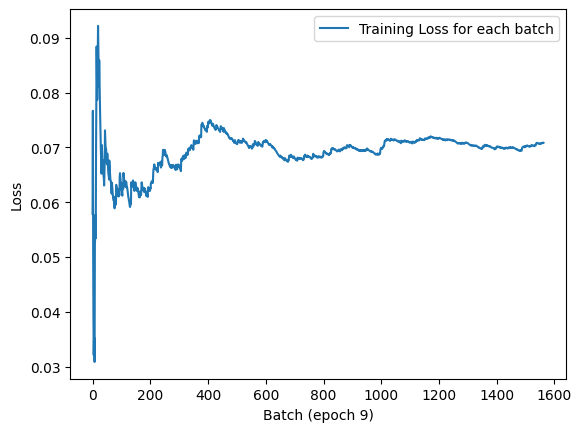

In [51]:
model.fit(train_images, train_labels, epochs=10, callbacks=[LossHistory()], validation_data=(val_images, val_labels))

# TensorBoard

In [56]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(log_dir="")
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels), callbacks=[tensorboard])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8635 - loss: 0.4474 - val_accuracy: 0.9571 - val_loss: 0.1473
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9528 - loss: 0.1694 - val_accuracy: 0.9680 - val_loss: 0.1122
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9616 - loss: 0.1323 - val_accuracy: 0.9714 - val_loss: 0.1064
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9689 - loss: 0.1110 - val_accuracy: 0.9739 - val_loss: 0.1016
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9726 - loss: 0.0959 - val_accuracy: 0.9769 - val_loss: 0.0967
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9749 - loss: 0.0871 - val_accuracy: 0.9758 - val_loss: 0.0935
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9774 - loss: 0.0837 - val_accuracy: 0.9776 - val_loss: 0.0897
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9771 - loss: 0.0845 - 

In [62]:
%load_ext tensorboard
%tensorboard --logdir .

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6008 (pid 4008), started 0:00:04 ago. (Use '!kill 4008' to kill it.)

In [63]:
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [64]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"Result after updating state: {current_result}")

Result after updating state: 1.0


In [66]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result()}")

Mean of values: 2.0


In [67]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()

optimizer = keras.optimizers.RMSprop()

metrics = [keras.metrics.SparseCategoricalAccuracy()]

loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, model.trainable_weights)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    
    logs = {}
    
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()
    
    loss_tracking_metric.update_state(loss)
    
    logs["loss"] = loss_tracking_metric.result()
    
    return logs

def reset_metrics():
    for metric in metrics:
        metric.reset_state()